# SDG 6: Rural Water Access in Sub-Saharan Africa
## Exploratory Data Analysis Report

---

**Date:** November 2025  
**Scope:** 50 Sub-Saharan African Countries | 2000-2022

---

## What This Report Is About (Plain Language)

This report examines **access to clean water in villages and rural areas** across Sub-Saharan Africa.

**Key Questions:**
- What percentage of village residents have access to basic water services?
- How has rural water access changed over time?
- Which countries have the best/worst rural water access?

**What is "At Least Basic" Water?**
- Drinking water from an improved source (protected well, borehole, rainwater, etc.)
- Collection time is not more than 30 minutes round trip

---

## Table of Contents
1. [Data Collection Plan](#1-data-collection)
2. [Data Loading & Cleaning](#2-data-loading)
3. [Summary Statistics](#3-statistics)
4. [Temporal Analysis](#4-temporal)
5. [Country Comparison](#5-countries)
6. [Key Findings](#6-findings)

---
# 1. Data Collection Plan <a id='1-data-collection'></a>

| Attribute | Details |
|-----------|----------|
| **Source** | WHO/UNICEF Joint Monitoring Programme (JMP) |
| **File** | JMP_2025_WLD.xlsx |
| **Indicator** | Rural - At least basic water service |
| **Coverage** | 50 Sub-Saharan African countries |
| **Time Period** | 2000-2022 |
| **License** | Public data |

---
# 2. Data Loading & Cleaning <a id='2-data-loading'></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Define SSA countries
ssa_countries = [
    "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cameroon", "Central African Republic",
    "Chad", "Comoros", "Congo", "Côte d'Ivoire",
    "Democratic Republic of the Congo", "Djibouti",
    "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia",
    "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau",
    "Kenya", "Lesotho", "Liberia", "Madagascar", "Malawi",
    "Mali", "Mauritania", "Mauritius", "Mozambique",
    "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
    "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa",
    "South Sudan", "Sudan", "Togo", "Tanzania",
    "Uganda", "Zambia", "Zimbabwe"
]

# JMP to SSA name mapping
jmp_to_ssa = {
    "United Republic of Tanzania": "Tanzania",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Swaziland": "Eswatini"
}

print(f"Target SSA countries: {len(ssa_countries)}")

Target SSA countries: 49


In [3]:
# Load Water Data from JMP
df_raw = pd.read_excel('../xls/JMP_2025_WLD.xlsx', sheet_name='Water', header=1)
print(f"Raw Data Shape: {df_raw.shape}")
print(f"\nFirst few columns: {df_raw.columns[:15].tolist()}")

Raw Data Shape: (5662, 58)

First few columns: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']


In [4]:
# Extract Rural Water columns
# Column indices: 0=Country, 1=Year, 4=Rural At least basic
df_water = pd.DataFrame({
    'Country': df_raw.iloc[:, 0],
    'Year': pd.to_numeric(df_raw.iloc[:, 1], errors='coerce'),
    'Rural_Water': pd.to_numeric(df_raw.iloc[:, 4], errors='coerce')
})

# Clean up
df_water = df_water[df_water['Country'] != 'COUNTRY, AREA OR TERRITORY']
df_water = df_water.dropna(subset=['Year'])
df_water['Year'] = df_water['Year'].astype(int)

# Standardize country names
df_water['Country'] = df_water['Country'].replace(jmp_to_ssa)

# Filter to SSA
df_ssa = df_water[df_water['Country'].isin(ssa_countries)].copy()

print(f"SSA Data Shape: {df_ssa.shape}")
print(f"Countries: {df_ssa['Country'].nunique()}")
print(f"Years: {df_ssa['Year'].min()} - {df_ssa['Year'].max()}")

SSA Data Shape: (1196, 3)
Countries: 49
Years: 2000 - 2024


In [5]:
# Data quality check
print("=" * 50)
print("DATA QUALITY ASSESSMENT")
print("=" * 50)

total_rows = len(df_ssa)
missing = df_ssa['Rural_Water'].isna().sum()
print(f"\nTotal data points: {total_rows}")
print(f"Missing values: {missing} ({missing/total_rows*100:.1f}%)")
print(f"Valid values: {total_rows - missing}")

# Missing by country
missing_by_country = df_ssa.groupby('Country')['Rural_Water'].apply(lambda x: x.isna().sum())
print(f"\nCountries with most missing data:")
print(missing_by_country.sort_values(ascending=False).head(10))

DATA QUALITY ASSESSMENT

Total data points: 1196
Missing values: 50 (4.2%)
Valid values: 1146

Countries with most missing data:
Country
Mauritius                25
Seychelles               25
Angola                    0
Sao Tome and Principe     0
Malawi                    0
Mali                      0
Mauritania                0
Mozambique                0
Namibia                   0
Niger                     0
Name: Rural_Water, dtype: int64


In [6]:
# Export clean dataset
df_ssa.to_csv('../csv/ssa_rural_water_clean.csv', index=False)
print("Clean dataset saved: ssa_rural_water_clean.csv")

Clean dataset saved: ssa_rural_water_clean.csv


---
# 3. Summary Statistics <a id='3-statistics'></a>

### What Are Summary Statistics? (Plain Language)

Summary statistics give us a quick overview of the data:
- **Mean (Average)**: Add up all values and divide by how many there are
- **Median**: The middle value when sorted (half above, half below)
- **Std (Standard Deviation)**: How spread out the values are from the average
- **Min/Max**: The smallest and largest values

In [7]:
# Overall statistics
print("=" * 50)
print("RURAL WATER ACCESS - SUMMARY STATISTICS")
print("=" * 50)

df_valid = df_ssa.dropna(subset=['Rural_Water'])
print("\n--- All Years Combined ---")
print(df_valid['Rural_Water'].describe())

RURAL WATER ACCESS - SUMMARY STATISTICS

--- All Years Combined ---
count    1146.000000
mean       48.849345
std        16.906737
min         7.512709
25%        36.519029
50%        49.105786
75%        60.837406
max        87.038708
Name: Rural_Water, dtype: float64


In [8]:
# Statistics by period
df_valid['Period'] = pd.cut(df_valid['Year'], bins=[1999, 2005, 2010, 2015, 2023], labels=['2000-05', '2006-10', '2011-15', '2016-22'])
period_stats = df_valid.groupby('Period')['Rural_Water'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

print("\n--- Statistics by Period ---")
print(period_stats.round(1))


--- Statistics by Period ---
         mean  median   std   min   max  count
Period                                        
2000-05  41.3    41.8  17.1   7.5  87.0    276
2006-10  45.4    45.0  16.0  16.0  86.2    230
2011-15  49.2    47.4  15.4  16.1  85.3    235
2016-22  55.3    54.5  15.3  13.8  84.7    361


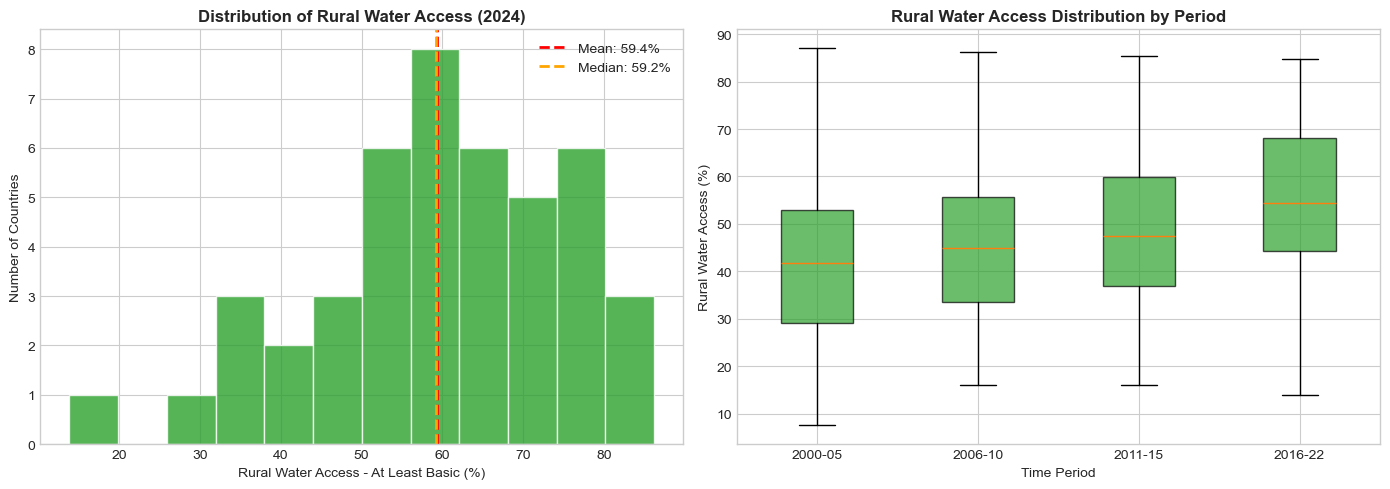

In [9]:
# Distribution visualization
latest_year = df_valid['Year'].max()
df_latest = df_valid[df_valid['Year'] == latest_year]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1 = axes[0]
ax1.hist(df_latest['Rural_Water'].dropna(), bins=12, color='#2ca02c', edgecolor='white', alpha=0.8)
ax1.axvline(df_latest['Rural_Water'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_latest["Rural_Water"].mean():.1f}%')
ax1.axvline(df_latest['Rural_Water'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df_latest["Rural_Water"].median():.1f}%')
ax1.set_xlabel('Rural Water Access - At Least Basic (%)')
ax1.set_ylabel('Number of Countries')
ax1.set_title(f'Distribution of Rural Water Access ({latest_year})', fontweight='bold')
ax1.legend()

# Box plot by period
ax2 = axes[1]
periods = ['2000-05', '2006-10', '2011-15', '2016-22']
period_data = [df_valid[df_valid['Period'] == p]['Rural_Water'].dropna() for p in periods]
bp = ax2.boxplot(period_data, labels=periods, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('#2ca02c')
    patch.set_alpha(0.7)
ax2.set_xlabel('Time Period')
ax2.set_ylabel('Rural Water Access (%)')
ax2.set_title('Rural Water Access Distribution by Period', fontweight='bold')

plt.tight_layout()
plt.savefig('../csv/rural_water_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

### What These Charts Show (Plain Language)

**Left Chart - Histogram:**
- Each bar shows how many countries have rural water access in that range
- The red dashed line is the average
- Rural water access is generally lower than urban water access

**Right Chart - Box Plots by Period:**
- Each box shows the distribution for that time period
- Upward movement over time indicates improvement in rural water access

---
# 4. Temporal Analysis <a id='4-temporal'></a>

### What is Temporal Analysis? (Plain Language)

Temporal analysis looks at how things change **over time**. We want to see:
- Is rural water access increasing or decreasing?
- How fast is it changing?

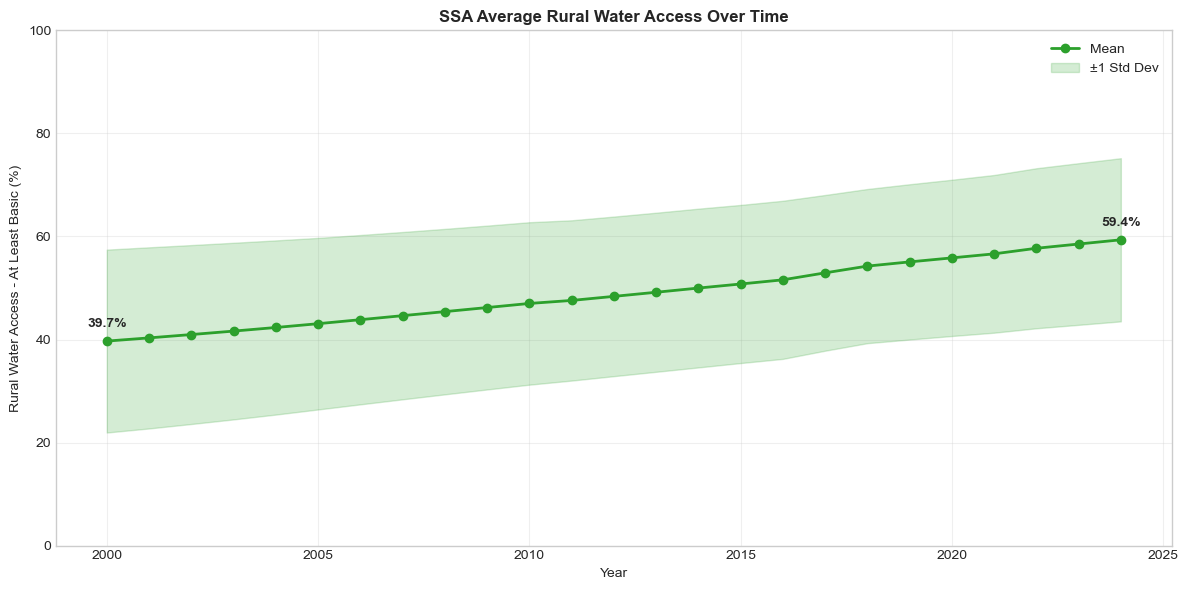


Change from 2000 to 2024: 39.7% → 59.4% (+19.7 percentage points)


In [10]:
# SSA average over time
yearly_avg = df_valid.groupby('Year')['Rural_Water'].agg(['mean', 'median', 'std', 'count']).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(yearly_avg['Year'], yearly_avg['mean'], marker='o', linewidth=2, color='#2ca02c', label='Mean')
ax.fill_between(yearly_avg['Year'], 
                yearly_avg['mean'] - yearly_avg['std'], 
                yearly_avg['mean'] + yearly_avg['std'], 
                alpha=0.2, color='#2ca02c', label='±1 Std Dev')

ax.set_xlabel('Year')
ax.set_ylabel('Rural Water Access - At Least Basic (%)')
ax.set_title('SSA Average Rural Water Access Over Time', fontweight='bold')
ax.legend()
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.3)

# Add annotations
first_year = yearly_avg['Year'].min()
last_year = yearly_avg['Year'].max()
first_val = yearly_avg[yearly_avg['Year'] == first_year]['mean'].values[0]
last_val = yearly_avg[yearly_avg['Year'] == last_year]['mean'].values[0]

ax.annotate(f'{first_val:.1f}%', (first_year, first_val), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')
ax.annotate(f'{last_val:.1f}%', (last_year, last_val), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../csv/rural_water_trend.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nChange from {first_year} to {last_year}: {first_val:.1f}% → {last_val:.1f}% ({last_val - first_val:+.1f} percentage points)")

### What This Chart Shows (Plain Language)

- The **green line** shows the average rural water access across all SSA countries each year
- The **shaded area** shows how much countries vary
- An **upward trend** means villages are getting better water access over time

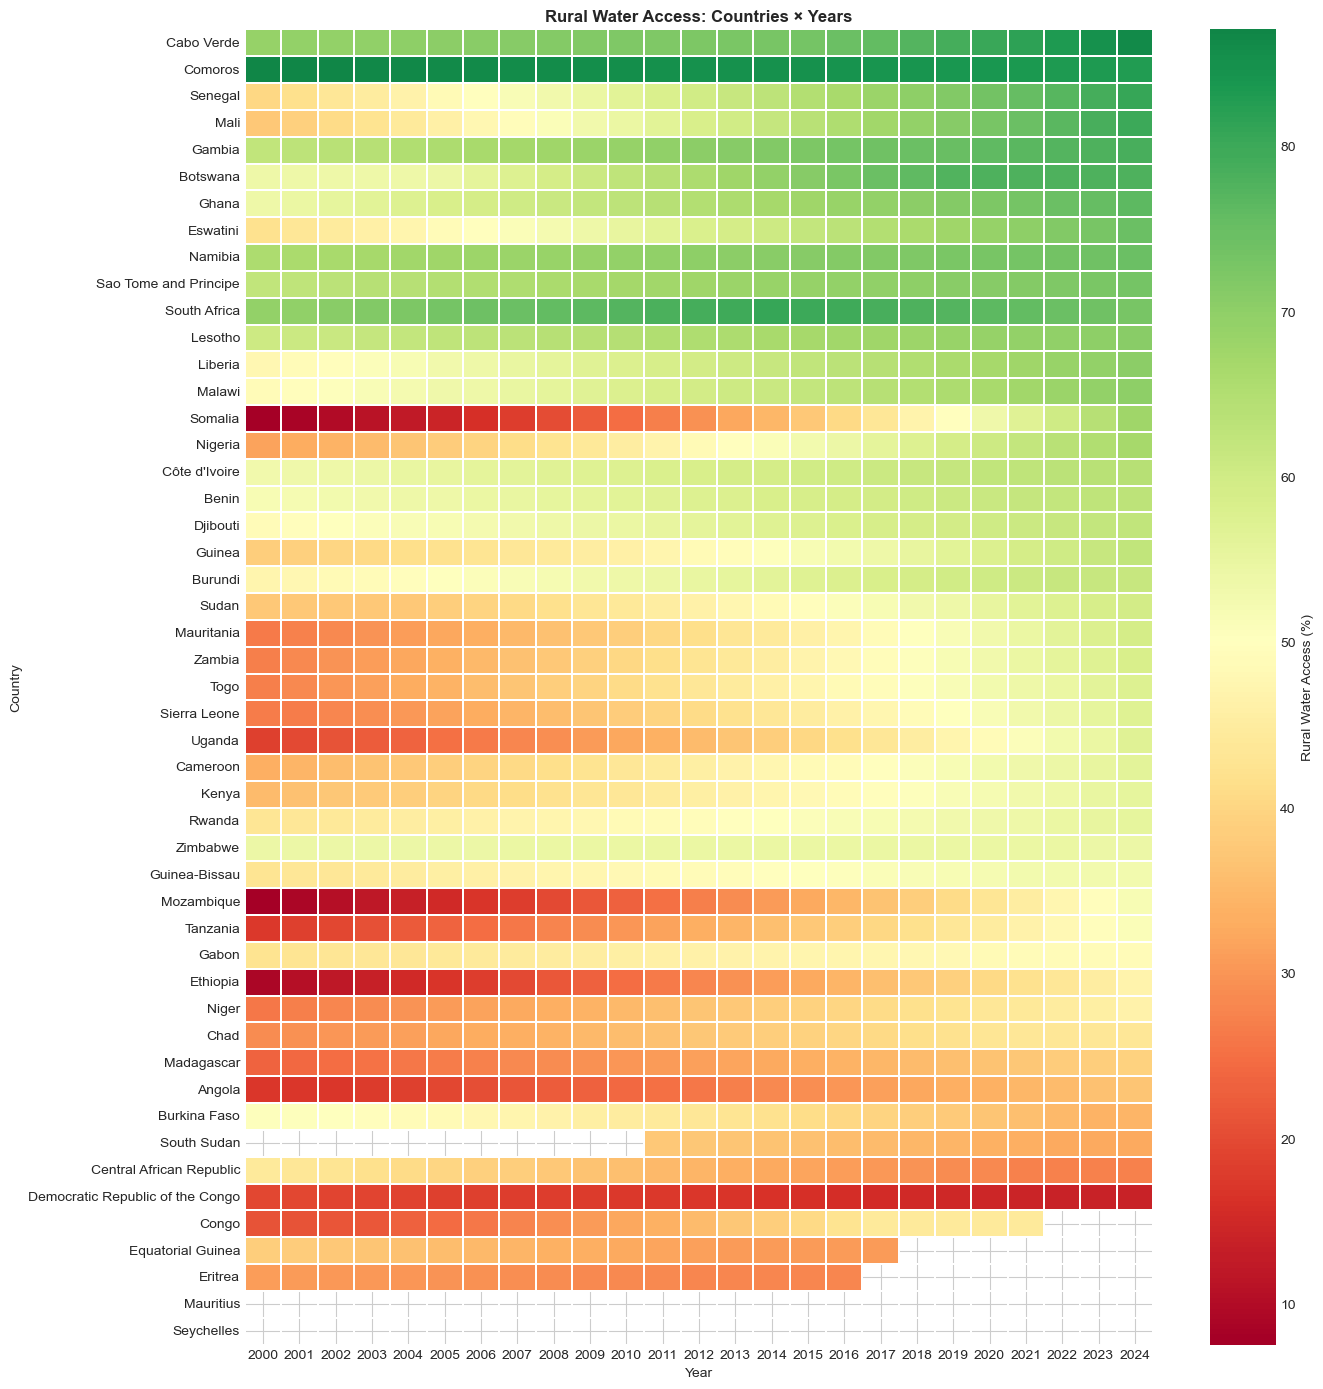

In [11]:
# Heatmap: Countries x Years
pivot_data = df_ssa.pivot(index='Country', columns='Year', values='Rural_Water')
pivot_data = pivot_data.sort_values(by=latest_year, ascending=False)

fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(pivot_data, cmap='RdYlGn', center=50, linewidths=0.1, 
            cbar_kws={'label': 'Rural Water Access (%)'}, ax=ax)
ax.set_title('Rural Water Access: Countries × Years', fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Country')

plt.tight_layout()
plt.savefig('../csv/rural_water_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

### What This Heatmap Shows (Plain Language)

- Each **row** is a country, each **column** is a year
- **Green** = high water access (good)
- **Yellow** = medium access
- **Red** = low access (poor) - this is common for rural areas
- **White/blank** = no data available

---
# 5. Country Comparison <a id='5-countries'></a>

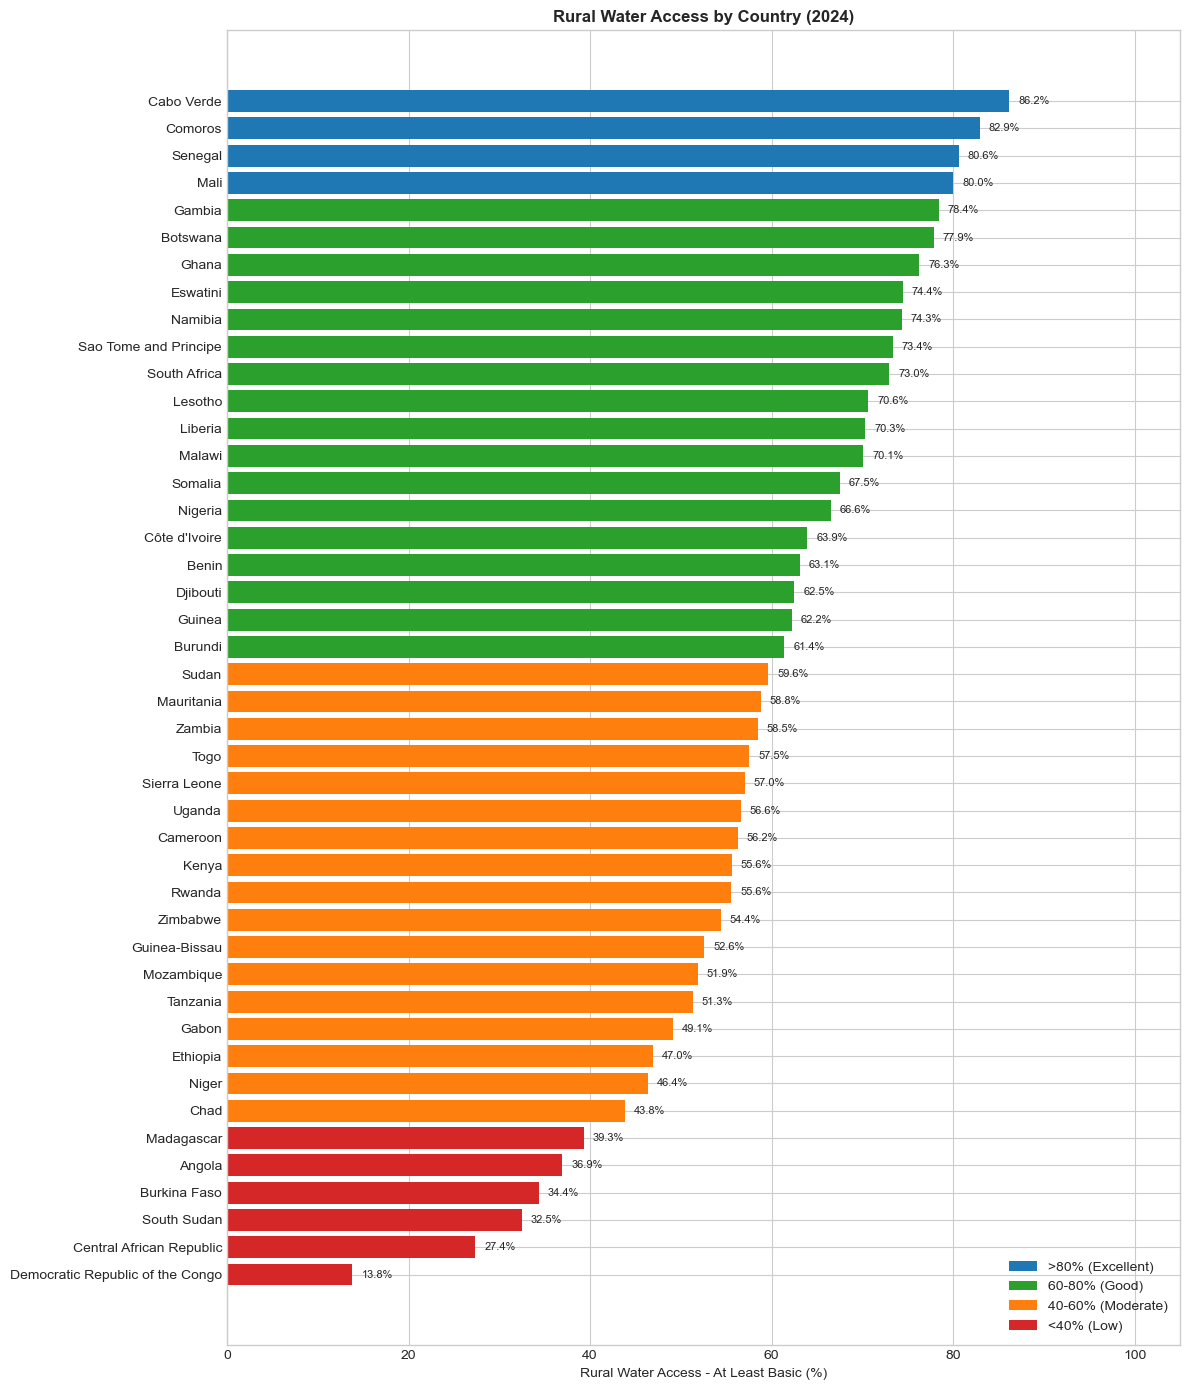

In [12]:
# Country ranking for latest year
country_latest = df_latest.groupby('Country')['Rural_Water'].mean().sort_values(ascending=True)

# Color by access level
colors = ['#d62728' if v < 40 else '#ff7f0e' if v < 60 else '#2ca02c' if v < 80 else '#1f77b4' for v in country_latest.values]

fig, ax = plt.subplots(figsize=(12, 14))
bars = ax.barh(country_latest.index, country_latest.values, color=colors)
ax.set_xlabel('Rural Water Access - At Least Basic (%)')
ax.set_title(f'Rural Water Access by Country ({latest_year})', fontweight='bold')
ax.set_xlim(0, 105)

# Add value labels
for i, (country, val) in enumerate(country_latest.items()):
    ax.text(val + 1, i, f'{val:.1f}%', va='center', fontsize=8)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#1f77b4', label='>80% (Excellent)'),
    Patch(facecolor='#2ca02c', label='60-80% (Good)'),
    Patch(facecolor='#ff7f0e', label='40-60% (Moderate)'),
    Patch(facecolor='#d62728', label='<40% (Low)')
]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('../csv/rural_water_country_ranking.png', dpi=150, bbox_inches='tight')
plt.show()

### What This Chart Shows (Plain Language)

- Each bar represents one country
- Longer bars = higher rural water access
- **Blue bars**: Excellent (>80%)
- **Green bars**: Good (60-80%)
- **Orange bars**: Moderate (40-60%)
- **Red bars**: Low (<40%) - many countries fall here for rural access

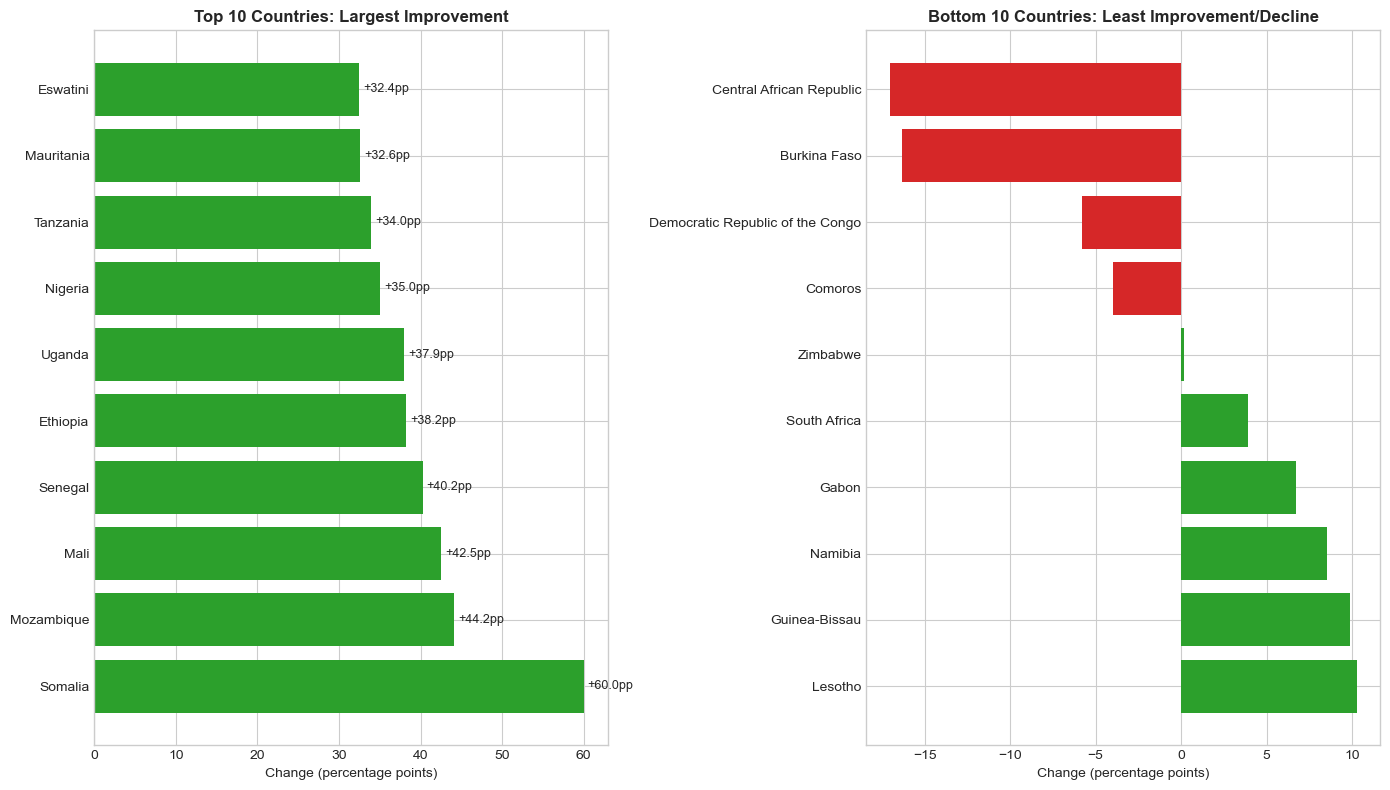

In [13]:
# Countries with most improvement
earliest_year = df_valid['Year'].min()
first_year_data = df_valid[df_valid['Year'] == earliest_year].set_index('Country')['Rural_Water']
last_year_data = df_valid[df_valid['Year'] == latest_year].set_index('Country')['Rural_Water']

change = (last_year_data - first_year_data).dropna().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Top improvers
ax1 = axes[0]
top_10 = change.head(10)
colors1 = ['#2ca02c' if v > 0 else '#d62728' for v in top_10.values]
ax1.barh(top_10.index, top_10.values, color=colors1)
ax1.set_xlabel('Change (percentage points)')
ax1.set_title('Top 10 Countries: Largest Improvement', fontweight='bold')
for i, (country, val) in enumerate(top_10.items()):
    ax1.text(val + 0.5, i, f'{val:+.1f}pp', va='center', fontsize=9)

# Declining or least improvement
ax2 = axes[1]
bottom_10 = change.tail(10)
colors2 = ['#2ca02c' if v > 0 else '#d62728' for v in bottom_10.values]
ax2.barh(bottom_10.index, bottom_10.values, color=colors2)
ax2.set_xlabel('Change (percentage points)')
ax2.set_title('Bottom 10 Countries: Least Improvement/Decline', fontweight='bold')

plt.tight_layout()
plt.savefig('../csv/rural_water_improvement.png', dpi=150, bbox_inches='tight')
plt.show()

### What This Chart Shows (Plain Language)

- **Left chart**: Countries that improved the most in rural water access
- **Right chart**: Countries that improved the least or declined
- Green bars = improvement, Red bars = decline

---
# 6. Key Findings <a id='6-findings'></a>

In [14]:
# Compile key findings
print("=" * 60)
print("KEY FINDINGS: RURAL WATER ACCESS IN SSA")
print("=" * 60)

print(f"\n1. CURRENT STATE ({latest_year})")
print(f"   - SSA Average: {df_latest['Rural_Water'].mean():.1f}%")
print(f"   - Median: {df_latest['Rural_Water'].median():.1f}%")
print(f"   - Range: {df_latest['Rural_Water'].min():.1f}% - {df_latest['Rural_Water'].max():.1f}%")

print(f"\n2. HISTORICAL CHANGE")
print(f"   - Start ({first_year}): {first_val:.1f}%")
print(f"   - End ({last_year}): {last_val:.1f}%")
print(f"   - Total change: {last_val - first_val:+.1f} percentage points")

print(f"\n3. COUNTRY RANKINGS ({latest_year})")
print(f"   - Countries with >80% rural water access: {(df_latest['Rural_Water'] > 80).sum()}")
print(f"   - Countries with <40% rural water access: {(df_latest['Rural_Water'] < 40).sum()}")

print(f"\n4. TOP PERFORMERS")
top_5 = country_latest.tail(5)
for country, val in top_5.items():
    print(f"   - {country}: {val:.1f}%")

print(f"\n5. DATA QUALITY")
print(f"   - Total data points: {len(df_ssa)}")
print(f"   - Missing values: {df_ssa['Rural_Water'].isna().sum()} ({df_ssa['Rural_Water'].isna().sum()/len(df_ssa)*100:.1f}%)")

KEY FINDINGS: RURAL WATER ACCESS IN SSA

1. CURRENT STATE (2024)
   - SSA Average: 59.4%
   - Median: 59.2%
   - Range: 13.8% - 86.2%

2. HISTORICAL CHANGE
   - Start (2000): 39.7%
   - End (2024): 59.4%
   - Total change: +19.7 percentage points

3. COUNTRY RANKINGS (2024)
   - Countries with >80% rural water access: 4
   - Countries with <40% rural water access: 6

4. TOP PERFORMERS
   - Gambia: 78.4%
   - Mali: 80.0%
   - Senegal: 80.6%
   - Comoros: 82.9%
   - Cabo Verde: 86.2%

5. DATA QUALITY
   - Total data points: 1196
   - Missing values: 50 (4.2%)


## Summary (Plain Language)

### What We Learned

1. **Rural water access remains a challenge**: Villages in Sub-Saharan Africa have significantly lower water access than cities.

2. **Access is improving**: Over the study period, rural water access has generally improved.

3. **Wide variation between countries**: Some countries have made significant progress, while others still have very low rural water access.

4. **Many countries still below 60%**: A significant number of SSA countries still have less than 60% of their rural population with basic water access.

### Why Rural Water Access Matters

- Clean water prevents waterborne diseases (cholera, dysentery, typhoid)
- Reduces time spent collecting water (often hours per day)
- Women and girls disproportionately bear the burden of water collection
- Access to clean water is essential for health, education, and economic development

### Data Limitations

- Data measures "at least basic" water - higher quality levels are not captured
- Some countries have missing data
- National rural averages may hide regional differences

---

*Data Source: WHO/UNICEF JMP*